# XGBoost

In [4]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import classification_report

from model_utils import calc_gini_coef, plot_pr_curve, plot_roc_curve

In [5]:
from model_utils import split_dataset

CLIENT_PATH = '../data/initial/CLIENTS.csv'
FEATURES_PATH = '../data/features/features_no_row_delete_inner_join.csv'

X_train, X_valid, X_test, y_train, y_valid, y_test = split_dataset(CLIENT_PATH, FEATURES_PATH, valid_size=0.2)
# X_train, X_test, y_train, y_test = split_dataset(CLIENT_PATH, FEATURES_PATH, valid_size=0.2)

In [39]:
# noinspection PyTypeChecker
model = xgb.XGBClassifier(
    n_estimators=2000,
    learning_rate=0.02,
    max_depth=3,
    min_child_weight=10,
    reg_alpha=1.0,
    reg_lambda=2.0,
    subsample=0.7,
    colsample_bytree=0.5,
    objective='binary:logistic',
    scale_pos_weight=3,
    n_jobs=6,
    random_state=42,
    eval_metric='logloss',
    early_stopping_rounds=50,
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=100,
)

[0]	validation_0-logloss:0.68667	validation_1-logloss:0.68681
[100]	validation_0-logloss:0.59651	validation_1-logloss:0.60278
[200]	validation_0-logloss:0.57474	validation_1-logloss:0.58607
[300]	validation_0-logloss:0.56339	validation_1-logloss:0.57931
[400]	validation_0-logloss:0.55446	validation_1-logloss:0.57484
[500]	validation_0-logloss:0.54667	validation_1-logloss:0.57044
[600]	validation_0-logloss:0.53961	validation_1-logloss:0.56679
[700]	validation_0-logloss:0.53385	validation_1-logloss:0.56432
[800]	validation_0-logloss:0.52786	validation_1-logloss:0.56167
[900]	validation_0-logloss:0.52320	validation_1-logloss:0.56033
[1000]	validation_0-logloss:0.51793	validation_1-logloss:0.55855
[1100]	validation_0-logloss:0.51329	validation_1-logloss:0.55702
[1200]	validation_0-logloss:0.50812	validation_1-logloss:0.55465
[1300]	validation_0-logloss:0.50401	validation_1-logloss:0.55355
[1400]	validation_0-logloss:0.49981	validation_1-logloss:0.55210
[1500]	validation_0-logloss:0.49570	v

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,'logloss'


In [44]:
# y_true = y_train
# y_pred_proba = model.predict_proba(X_train)[:, 1]
y_true = y_valid
y_pred_proba = model.predict_proba(X_valid)[:, 1]
# y_true = y_test
# y_pred_proba = model.predict_proba(X_test)[:, 1]

Gini Coefficient:  0.5677061105806938


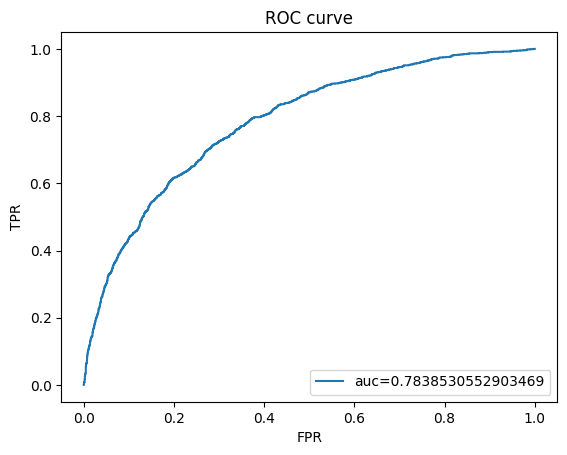

In [45]:
gini_coef = calc_gini_coef(y_true, y_pred_proba)
print('Gini Coefficient: ', gini_coef)

plot_roc_curve(y_true, y_pred_proba)

In [46]:
y_pred = (y_pred_proba >= 0.5).astype(int)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.73      0.80      4185
        True       0.46      0.68      0.55      1374

    accuracy                           0.72      5559
   macro avg       0.67      0.71      0.67      5559
weighted avg       0.77      0.72      0.74      5559



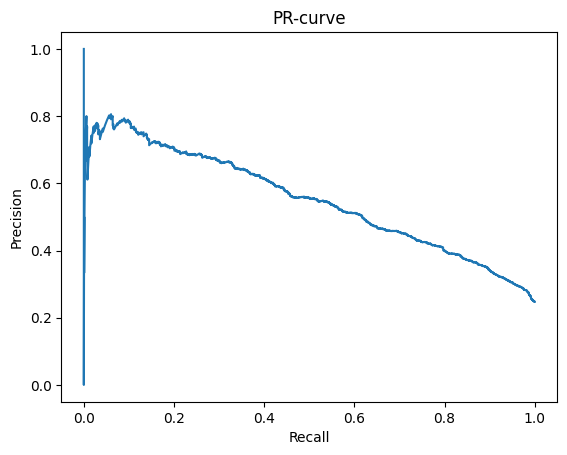

In [47]:
plot_pr_curve(y_true, y_pred_proba)

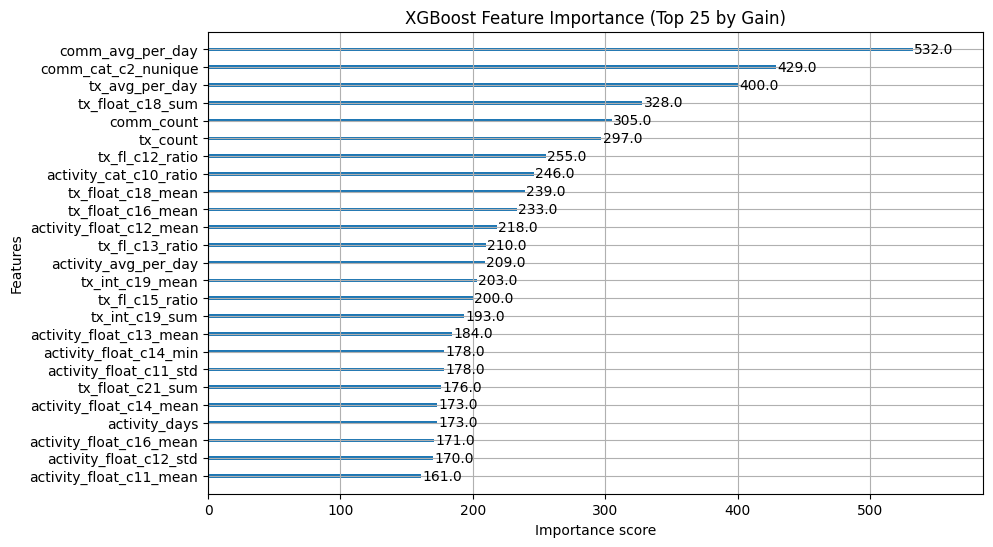

In [52]:
# Feature importance
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model, ax=ax, importance_type='weight', max_num_features=25)
plt.title('XGBoost Feature Importance (Top 25 by Gain)')
plt.show()